In [1]:
import pandas as pd
import os
import sys
parent_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(os.path.abspath(parent_path))
from constants import HAWAJEZ,STATUS_WORDS,STATUS
from fuzzywuzzy import fuzz
from utils.helpers import is_talking_about_it,is_it_match_status
import concurrent.futures


c:\Users\nasser\AppData\Local\Programs\Python\Python311\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [6]:
data = pd.read_csv('../data/more_data.csv')

In [7]:
data.shape

(805422, 1)

In [8]:
data =data[['full_text']]

In [9]:
data.shape

(805422, 1)

In [10]:
for hajez in HAWAJEZ:
    data[hajez]  = data['full_text'].apply(lambda x: is_talking_about_it(hajez, x))

In [11]:
# display all the columns
pd.set_option('display.max_columns', None)
data

,full_text,حوارة,دير شرف,صرة,دوار سلمان,بيت فوريك,شافي شمرون,الحمرا,جيت,عراق بورين,يتسهار,الفندق,عين يبرود,المربعه,بيتا,بيت ايل,صره,عينابوس,عين سينا,قرني شمرون,عورتا,الطنيب,كدوميم,العيزرية,حومش,زعترة,عوفرا,الكونتينر,عناتا,حزما,الكنتينر,قلنديا,جبع,تل,دي سي او
0,حاجز حواره محسوم,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,يا مجموعه زعتره سألكه مليون بلميه حتى فش جيش و...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,قوات الاحتلال تقوم بمغلقة سيارات المواطنين بشك...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,المربعه سالكةة,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,كيف مخصوم جبع|||اغلاق لهاي اللحظة,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805417,عوفرا مسكر او فاتح ؟|||مسكر,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
805418,زعترة فش اشي للخارج,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
805419,حوارة|||سكر,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
805420,شو وضع شافي شمرون|||سكرو,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
for status in STATUS_WORDS:
    # ket the key crossponding to the value status
    key = [k for k, v in STATUS.items() if v == status][0]
    data[status]  = data['full_text'].apply(lambda x: is_it_match_status(key, x))
    print(f"{status} is done")

مفتوح is done
مغلق is done
ازمة is done
حذر is done


In [13]:

data = data[data[STATUS_WORDS].sum(axis=1) != 0]


<Axes: title={'center': 'Status Words Distribution'}>

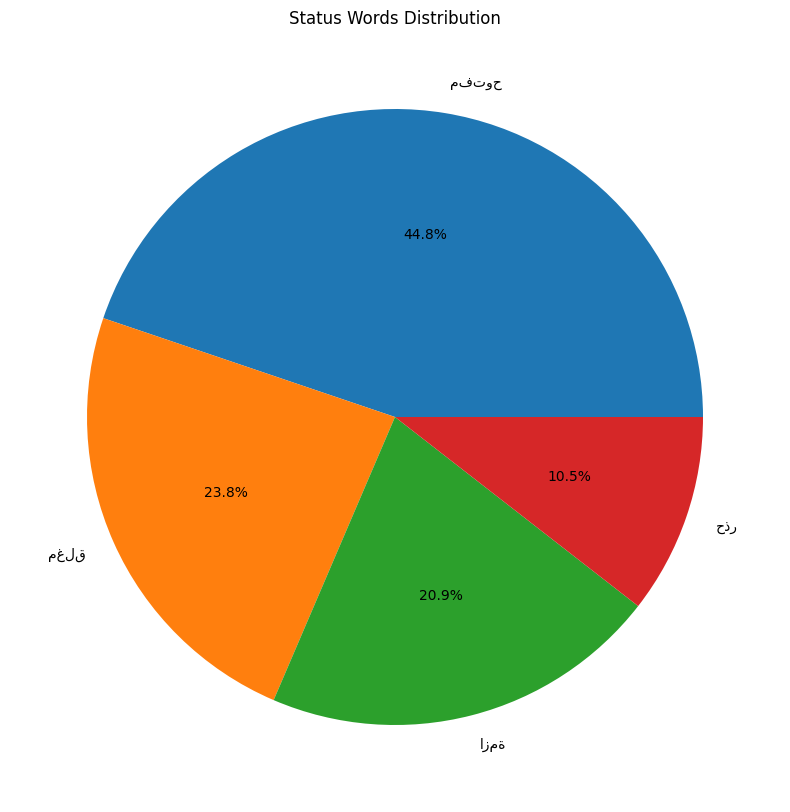

In [14]:
# get the sum for each column of status words and draw a pie chart
data[STATUS_WORDS].sum().plot.pie(figsize=(10, 10), autopct='%1.1f%%', title='Status Words Distribution')

<Axes: title={'center': 'Hajez Distribution'}>

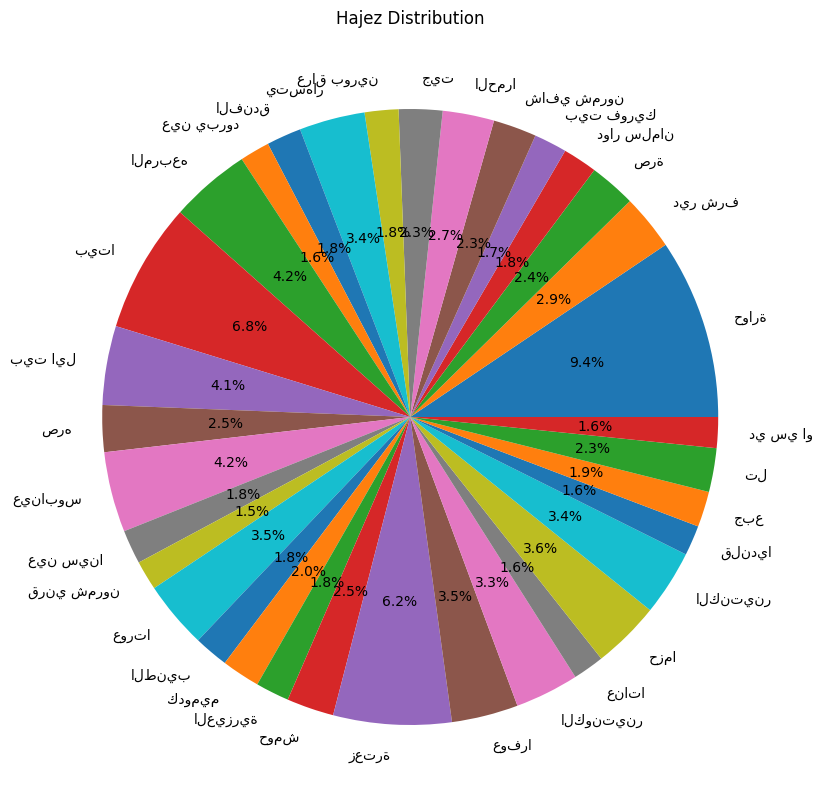

In [15]:
# draw a pie chart for each hajez
data[HAWAJEZ].sum().plot.pie(figsize=(10, 10), autopct='%1.1f%%', title='Hajez Distribution')


In [16]:
# print sample of the data only show the columns that have 1 in them for that row
data[data[STATUS_WORDS + HAWAJEZ].sum(axis=1) != 0].sample(10)


,full_text,حوارة,دير شرف,صرة,دوار سلمان,بيت فوريك,شافي شمرون,الحمرا,جيت,عراق بورين,يتسهار,الفندق,عين يبرود,المربعه,بيتا,بيت ايل,صره,عينابوس,عين سينا,قرني شمرون,عورتا,الطنيب,كدوميم,العيزرية,حومش,زعترة,عوفرا,الكونتينر,عناتا,حزما,الكنتينر,قلنديا,جبع,تل,دي سي او,مفتوح,مغلق,ازمة,حذر
210821,زعتره شباب للي مروح من رام الله؟؟؟|||فتح بجميع...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
122683,حركة على دوار حواره وتشديد وفحص,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
676262,دير شرف فاتحة بالاتجاهين,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
375388,حزما زاطمةه,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
388535,وضع حزما شباب ؟|||سالك,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
203430,شباب شو وضع الكونتينر|||نظيفة ماشية,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
170734,فش اشي حوارة,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
89976,اشارات عيون الحراميه باتجاه عراق بورين حاليا ح...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
663826,كيف جيت|||ماشيه,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
106797,حوارة فتح فى الاتجاهين,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [13]:

# drop them
data = data[data[HAWAJEZ].sum(axis=1) != 0]


In [14]:
data.to_csv('../data/labeld_data_huge.csv', index=False)